# Êï∞ÊçÆËØªÂèñ

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency,pointbiserialr
from scipy.stats.contingency import association
import plotly.express as px
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from scipy.stats import beta
from statsmodels.stats.proportion import proportion_confint
from collections import Counter
import xgboost as xgb
# from tqdm import tqdm  # Áî® tqdm ‰ª£Êõø tqdm.autonotebook.tqdm
import shap
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 


file_path = r"D:\ÂÖºËÅå\ÂÖºËÅå\‰ΩúÂìÅÈ°πÁõÆ\coupons.csv"
df = pd.read_csv(file_path, engine='python')
data = df.copy()
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

# Êï∞ÊçÆÊé¢Á¥¢ÊÄßÂàÜÊûê

Âú®Êï∞ÊçÆ‰∏ãËΩΩÁöÑÁΩëÁ´ôÂ∑≤ÁªèÊèê‰æõ‰∫ÜÊï∞ÊçÆË°åÊï∞„ÄÅÂ≠óÊÆµÊï∞ÂíåÂê´‰πâËß£Èáä„ÄÇÊé•‰∏ãÊù•ÈúÄË¶ÅÈ™åËØÅ‰∏ãÊãøÂà∞ÊâãÁöÑÊï∞ÊçÆÈõÜÊòØÂê¶Á¨¶ÂêàÊèèËø∞„ÄÇ

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [3]:
data.shape

(12684, 26)

Êï∞ÊçÆÂ§ßÂ∞èÂíåÁΩëÁ´ôÊèèËø∞‰∏ÄËá¥ÔºåÊé•‰∏ãÊù•Ë¶ÅÂØπÊï∞ÊçÆËøõË°åÊé¢Á¥¢ÊÄßÂàÜÊûê„ÄÇ‰ª•ÂèäËßÇÂØüÂà∞Êúâ‰∫õÂ≠óÊÆµÂ≠òÂú®Êï∞ÊçÆÁº∫Â§±ÁöÑÊÉÖÂÜµÔºåÂ∞ΩÁÆ°ÁΩëÁ´ôÂÜôÁöÑÊòØMissing Values is no‚Ä¶‚Ä¶ÊØîÂ¶ÇcarÂ≠óÊÆµÁº∫Â§±ËæÉÂ§öÔºåÊé•‰∏ãÊù•Êï∞ÊçÆÊ∏ÖÊ¥óÊó∂ÂèØ‰ª•Âà†Èô§„ÄÇ

## Êï∞ÊçÆÊïàÂ∫¶

Âõ†‰∏∫‰∏çÈÄÇÁî®‰∫é‰ø°Â∫¶Ê£ÄÈ™åÁöÑÊñπÂºèÔºåÊâÄ‰ª•Âè™ËÉΩÂØπÈóÆÂç∑Êï∞ÊçÆËøõË°å‰∏Ä‰∫õÊïàÂ∫¶Ê£ÄÈ™å„ÄÇÊØîÂ¶ÇÁªìÊûÑÊÄßÔºöÊòØÂê¶ÂÖÖÂàÜÊ∂µÁõñ‰∫ÜÂ§öÁßçÁ±ªÂûãÔºüÁªìÊûú‰∏äÊòØÂê¶Âè™ÂÅèÂêë‰∏ÄÁßçÁªìÊûúÔºüÔºàËôΩÁÑ∂ÂèØËÉΩÁ¨¶ÂêàÂÆûÈôÖÊÉÖÂÜµÔºå‰ΩÜÊòØ‰∏çÂà©‰∫éÂÖ®Èù¢ÁöÑÂàÜÊûêÔºâ

In [4]:
y = data['Y'].value_counts()

px.bar(x = y.index , y = y, title = 'Y Value', width = 600, height = 400, color = y.index)

1:0=7210:5474
ÁªìÊûúÂàÜÂ∏ÉÊòØ‰∏çÂπ≥Ë°°ÁöÑ„ÄÇ‰ΩÜÊòØÂ∑ÆË∑ù‰∏çÊòØÈùûÂ∏∏Â∑®Â§ßÔºåËÄå‰∏î0ÁöÑÊï∞ÊçÆÈáè‰πüËæÉÂ§ßÔºåÊé•‰∏ãÊù•Ë¶ÅÁúãÂêÑÂèØËÉΩÂΩ±ÂìçÂõ†Á¥†ÁöÑÁªìÊûÑÂàÜÂ∏ÉÊÉÖÂÜµÔºåËÉΩÂê¶ÂåÖÂê´ÂÖ®Èù¢ÁöÑ‰ø°ÊÅØ

In [8]:
# ‰∏∫‰∫ÜÊñπ‰æøÁêÜËß£ÂàÜÊûêÔºåÂ∞ÜÂçéÊ∞èÂ∫¶ËΩ¨‰∏∫ÊëÑÊ∞èÂ∫¶
data['temperature'] = ((data['temperature'] - 32) * (5 / 9)).round(2)


In [9]:
object_cols = data.columns.to_list()

# ÂÆö‰πâÂ≠êÂõæË°åÂàóÊï∞
cols = 4
rows = (len(object_cols) - 1) // cols + 1

obj = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=object_cols,
    specs=[[{'type': 'domain'} for _ in range(cols)] for _ in range(rows)]  
)


for index, col in enumerate(object_cols):
    labels = data[col].value_counts().index
    values = data[col].value_counts().values
    row = index // cols + 1 
    col_ = index % cols + 1

    obj.add_trace(
        go.Pie(labels=labels, values=values, name=col),
        row=row, col=col_
    )

obj.update_layout(height=2000, width=1000, title_text="ÂàÜÂ∏ÉÈ•ºÂõæ")
obj.show()

Â•ΩÁöÑÔºåÂØπ‰∫éÂêÑÂ≠óÊÆµËøõË°åÂàÜÊûêÔºåÁúãÊé•‰∏ãÊù•Â∫îËØ•Â¶Ç‰ΩïÊ∏ÖÊ¥óÊï∞ÊçÆÔºö
1. ÂØπ‰∫édestinationËøô‰∏™Â≠óÊÆµÔºåno urgent place Âç†‰∫Ü‰∏ÄÂçä„ÄÇÂá≠ÁªèÈ™åÊÑüÁü•ÔºåÊàñËÆ∏ÂíåÂÆûÈôÖÊÉÖÂÜµÂÅèÂ∑ÆËæÉÂ§ß„ÄÇ
2. occupayion ÁªÜÂàÜÁ±ªËøáÂ§öÔºåÈúÄË¶ÅÊï¥Âêà
3. car Êï∞ÊçÆÈáèÁº∫Â§±‰∏•ÈáçÔºåÈúÄË¶Ådrop
4. ÂÖ∂‰ΩôÂêÑÁ±ªÂûãÂàÜÂ∏ÉËæÉÂêàÁêÜ„ÄÇÂõ†‰∏∫ÈóÆÂç∑ÂØπË±°ÊòØÁæéÂõΩ‰∫∫ÔºåÂíå‰∏≠ÂõΩ‰∫∫Âè£ÁªìÊûÑ„ÄÅÊî∂ÂÖ•Ê∞¥Âπ≥„ÄÅÁ§æ‰ºöÁªìÊûÑÂ∑ÆË∑ùËæÉÂ§ß„ÄÇ

### Summary for Êï∞ÊçÆÊïàÂ∫¶Ôºö
1. destination Â≠óÊÆµÊïàÂ∫¶Â≠òÁñë
2. Êï¥‰ΩìÁï•‰∏çÂπ≥Ë°°Ôºå‰ΩÜÂèØËÉΩÂèçÊò†‰∫ÜÂÆûÈôÖÊÉÖÂÜµÔºåËÄå‰∏îÂ∑ÆÂà´‰∏çÂ§ßÔºåÂêÑÁæ§‰ΩìÊ†∑Êú¨Èáè‰πüËæÉ‰∏∫ÂÖÖË∂≥„ÄÇ
3. ÂêéÁª≠ÂØπoccupayion  Âíå car  ËøõË°åËøõ‰∏ÄÊ≠•Â§ÑÁêÜ„ÄÇ
4. ÂØπ‰∫éÁ©∫ÂÄº„ÄÅÈáçÂ§çÂÄºËøõË°åÂ§ÑÁêÜ
5. ‰∏∫‰∫ÜÊñπ‰æø‰∏öÂä°ÂàÜÊûêÔºåÂØπ‰∫éÊï∞ÂÄºÂûãÊï∞ÊçÆÊâìÊ†áÁ≠æ
### SO Êï∞ÊçÆÂèØÁî®

## Êï∞ÊçÆÊ∏ÖÊ¥ó

In [10]:
## ÈáçÂ§çÂÄº
data.drop_duplicates()
print('ÈáçÂ§çÊï∞ÊçÆ ' + str(data.duplicated().sum())  )

## drop car
data = data.drop(columns = 'car')

## Á©∫ÂÄºÂ§ÑÁêÜ
## Ê†πÊçÆ‰πãÂâçÁöÑËßÇÂØüÔºåÂè™ÊúâËøôÂá†‰∏™Â≠óÊÆµÊúâÁº∫Â§±

print(
(data.shape[0] - data[['CoffeeHouse',
                          'Restaurant20To50',
                          'CarryAway',
                          'RestaurantLessThan20',
                          'Bar']].isnull().sum()).sort_values(ascending=False))
print('ÈúÄË¶ÅÂà†Èô§ÁöÑË°å ' + str(data.shape[0] - data.dropna().shape[0]) )

print('Âç†ÊØî ' + str(np.round((1 - (data.dropna().shape[0] / data.shape[0])) * 100, 2)) + ' %' )

data = data.dropna()


print('Âà†Èô§ÂêéÁ©∫ÂÄºÊï∞' +  str(data.isnull().sum()))

## occupayion Êï¥Âêà

occupation_mapping = {
    'Computer & Mathematical': 'Technical engineering',
    'Architecture & Engineering': 'Technical engineering',
    'Life Physical Social Science': 'Technical engineering',
    'Sales & Related': 'Business Management',
    'Management': 'Business Management',
    'Office & Administrative Support': 'Business Management',
    'Business & Financial': 'Business Management',
    'Food Preparation & Serving Related': 'Social service',
    'Healthcare Support': 'Social service',
    'Transportation & Material Moving': 'Social service',
    'Building & Grounds Cleaning & Maintenance': 'Social service',
    'Education&Training&Library': 'Public affairs',
    'Healthcare Practitioners & Technical': 'Public affairs',
    'Community & Social Services': 'Public affairs',
    'Legal': 'Public affairs',
    'Protective Service': 'Public affairs',
    'Arts Design Entertainment Sports & Media': 'Creative industries',
    'Personal Care & Service': 'Creative industries',
    'Construction & Extraction': 'Basic industries',
    'Installation Maintenance & Repair': 'Basic industries',
    'Production Occupations': 'Basic industries',
    'Farming Fishing & Forestry': 'Basic industries',
    'Unemployed': 'Inactive employment',
    'Student': 'Inactive employment',
    'Retired': 'Inactive employment'
}

data['occupation'] = data['occupation'].replace(occupation_mapping)

print('occupation‰øÆÊîπÂêéÂàÜÂ∏ÉÔºö'+ str(data['occupation'].value_counts()))

## has_children
has_children_mapping = {
    1: 'has_children',
    0: 'no_children'
    }
data['has_children'] = data['has_children'].replace(has_children_mapping)

print('has_children‰øÆÊîπÂêéÂàÜÂ∏ÉÔºö'+ str(data['has_children'].value_counts()))

conditions = [
    data['toCoupon_GEQ15min'] == 0,
    (data['toCoupon_GEQ15min'] == 1) & (data['toCoupon_GEQ25min'] == 0),
    data['toCoupon_GEQ25min'] == 1
]

choices = ['short', 'medium', 'long']

data['toCoupon_time'] = np.select(conditions, choices, default='unknown')

print('toCoupon_time‰øÆÊîπÂêéÂàÜÂ∏ÉÔºö'+ str(data['toCoupon_time'].value_counts()))

ÈáçÂ§çÊï∞ÊçÆ 74
Bar                     12577
RestaurantLessThan20    12554
CarryAway               12533
Restaurant20To50        12495
CoffeeHouse             12467
dtype: int64
ÈúÄË¶ÅÂà†Èô§ÁöÑË°å 605
Âç†ÊØî 4.77 %
Âà†Èô§ÂêéÁ©∫ÂÄºÊï∞destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64
occupation‰øÆÊîπÂêéÂàÜÂ∏ÉÔºöInactive employment      3784
Business Management      2977
Technical engin

# ÊâæÂá∫ÂΩ±Âìç‰ΩøÁî®‰ºòÊÉ†Âà∏ÁöÑÂÖ≥ÈîÆÁâπÂæÅÔºåÁî®‰∫é‰ºòÂåñ‰ºòÊÉ†Âà∏Á≠ñÁï•

### ÂçïÂõ†Á¥†‰ΩøÁî®ËΩ¨ÂåñÁéáÂàÜÊûê

In [11]:

# Âà§Êñ≠ÂèòÈáè‰∏éÁõÆÊ†áÂèòÈáèÊòØÂê¶Áõ∏ÂÖ≥ÔºàÂç°ÊñπÊ£ÄÈ™åÔºâ
def check_correlation(data, col, target_col):
    contingency = pd.crosstab(data[col], data[target_col])
    res = chi2_contingency(contingency)
    print(f"{col} - {target_col}:", 'Áõ∏ÂÖ≥' if res[1] < 0.05 else '‰∏çÁõ∏ÂÖ≥', f"pÂÄº={res[1]:.4f}")

# ËÆ°ÁÆóÊØè‰∏™Á±ªÂà´ÂèòÈáèÁöÑÊ≠£Ê†∑Êú¨ËΩ¨ÂåñÁéá
def probability(data, col, target_col='Y'):    
    yes_counts = data[data[target_col] == 1][col].value_counts()
    total_counts = data[col].value_counts()
    ratio_yes = (yes_counts / total_counts).fillna(0) * 100
    # ÊéíÂ∫è
    ratio_yes = ratio_yes.sort_values(ascending=False)    
    return ratio_yes.index.astype(str), ratio_yes.values  # x Âíå y ÂàÜÂà´ËøîÂõû

clran_cols = data.columns.to_list()

# ÂàõÂª∫ subplot
bar = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=clran_cols,
    specs=[[{'type': 'bar'} for _ in range(cols)] for _ in range(rows)]
)

# ÁªòÂà∂ÂõæË°® + ÊâìÂç∞Âç°ÊñπÊ£ÄÈ™åÁªìÊûú
for i, col in enumerate(clran_cols):
    row = i // cols + 1
    col_ = i % cols + 1
    
    x_vals, y_vals = probability(data, col, 'Y')

    bar.add_trace(
        go.Bar(x=x_vals, y=y_vals, name=col, text=[f"{v:.2f}%" for v in y_vals], textposition='auto'),
        row=row,
        col=col_
    )
    
    check_correlation(data.copy(), col, 'Y')

bar.update_layout(height=500 * rows, width=1000, title_text="ÂàÜÁ±ªÂèòÈáèÁöÑËΩ¨ÂåñÁéá & Áõ∏ÂÖ≥ÊÄßÂàÜÊûê")
bar.show()

destination - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
passanger - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
weather - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
temperature - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
time - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
coupon - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
expiration - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
gender - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
age - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
maritalStatus - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
has_children - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
education - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
occupation - Y: Áõ∏ÂÖ≥ pÂÄº=0.0011
income - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
Bar - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
CoffeeHouse - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
CarryAway - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
RestaurantLessThan20 - Y: Áõ∏ÂÖ≥ pÂÄº=0.0006
Restaurant20To50 - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
toCoupon_GEQ5min - Y: ‰∏çÁõ∏ÂÖ≥ pÂÄº=1.0000
toCoupon_GEQ15min - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
toCoupon_GEQ25min - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
direction_same - Y: ‰∏çÁõ∏ÂÖ≥ pÂÄº=0.1197
direction_opp - Y: ‰∏çÁõ∏ÂÖ≥ pÂÄº=0.1197
Y - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000
toCoupon_time - Y: Áõ∏ÂÖ≥ pÂÄº=0.0000


‰∏Ä‰∫õÂæàÊúâÊÑèÊÄùÁöÑÂèëÁé∞ÔºåÁîöËá≥ËøùÂèç‰∫ÜËÆ§Áü•Ôºö
1. direction_sameÂíådirection_opp Á´üÁÑ∂ÂíåÁªìÊûúÊó†ÂÖ≥‚Ä¶‚Ä¶ÂèØËÉΩÊòØÁî±‰∫éÔºåÂ¶ÇÊûúÊ∂àË¥πÂú∫ÊâÄ‰ΩçÁΩÆË∑ùÁ¶ªËæÉËøëÔºåÈÇ£‰πàÂç≥‰æøÊñπÂêë‰∏çÂêå‰πü‰∏çÂΩ±ÂìçÂÜ≥Á≠ñ„ÄÇÂêéÁª≠ÂèØÊ†πÊçÆÂàÜÊûêÁªìÊûúÔºåËÄÉËôëÊòØÂê¶ËøõË°åÊ∑±ÂÖ•Á†îÁ©∂„ÄÇ
2. ÂØπ‰∫éÂêÑÁ±ªÂú∫ÊâÄneverÁöÑ‰∫∫Áæ§ÔºåËΩ¨ÂåñÁéá‰πüÊúâ50%Â∑¶Âè≥„ÄÇ

ÊâæÂá∫ÁªÑÂêàÊòéÊòæÊúâÊïàÁöÑÁâπÂæÅ

destination
passanger
weather
temperature
time
coupon
expiration
gender
age
maritalStatus
has_children
education
occupation
income
toCoupon_time

ÁªèËøáÂâçÈù¢ÁöÑÊúâÊïàÊÄßÂàÜÊûêÂíåÊï¥‰ΩìÂÖ≥ËÅîË¶ÅÈÅøÂÖçÂú∫ÊâÄÁªÜÂàÜÔºåÂàùÊ≠•Á≠õÈÄâÁöÑÁâπÂæÅ„ÄÇÂõ†‰∏∫Â≠òÂú®‰∏Ä‰∫õËøùÂèçËÆ§Áü•ÁöÑÁªìÊûúÔºåÊâÄ‰ª•Âà§Êñ≠ÊØè‰∏™Âõ†Á¥†ÂØπÊé•ÂèóÁéáÁöÑÂΩ±ÂìçÊñπÂêëÂíåÂΩ±ÂìçÂ∫¶„ÄÇ

In [12]:
all_features = ['destination',
'passanger',
'weather',
'temperature',
'time',
'expiration',
'gender',
'age',
'maritalStatus',
'has_children',
'education',
'occupation',
'income',
'toCoupon_time'
]
# Âè™‰øùÁïôËøô‰∫õÁâπÂæÅ + Ê†áÁ≠æÂàó
data_all_features= data[all_features + ['Y']].dropna()

üìä Ê®°ÂûãËØÑ‰º∞Êä•ÂëäÔºö
              precision    recall  f1-score   support

           0     0.5564    0.4104    0.4724      1021
           1     0.6380    0.7606    0.6939      1395

    accuracy                         0.6126      2416
   macro avg     0.5972    0.5855    0.5831      2416
weighted avg     0.6035    0.6126    0.6003      2416

Accuracy : 0.6126
Precision: 0.6380
Recall   : 0.7606

üéØ ÊØè‰∏™ÁâπÂæÅÈ°πÂØπÊé•Êî∂‰ºòÊÉ†Âà∏ÁöÑÂΩ±ÂìçÊñπÂêëÔºàÂâçÈÉ®ÂàÜÔºâ:
| feature                          |     coef | impact   |
|:---------------------------------|---------:|:---------|
| cat__education_Some High School  | 0.518818 | Ê≠£Âêë     |
| cat__passanger_Friend(s)         | 0.323237 | Ê≠£Âêë     |
| cat__expiration_1d               | 0.316338 | Ê≠£Âêë     |
| cat__weather_Sunny               | 0.30646  | Ê≠£Âêë     |
| cat__age_below21                 | 0.250567 | Ê≠£Âêë     |
| cat__destination_No Urgent Place | 0.235569 | Ê≠£Âêë     |
| cat__maritalStatus_Single        | 

D:\Anaconda\data\lib\site-packages\pandas\compat\_optional.py:117: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\data\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



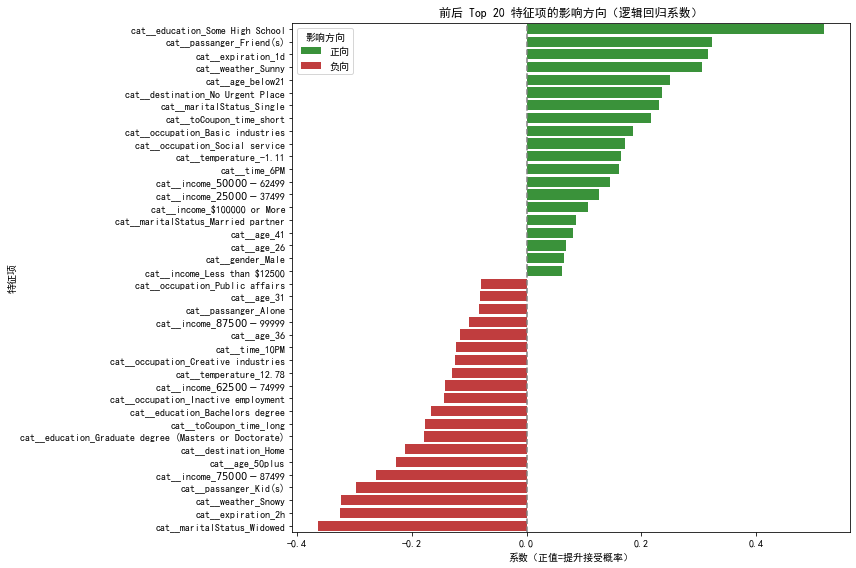

In [14]:
def analyze_logistic_feature_impact(X, y, top_k=20, random_state=42):
    """ÈÄªËæëÂõûÂΩíÔºöÂàÜÊûêÁâπÂæÅÂØπÊé•Âèó‰ºòÊÉ†Âà∏ÁöÑÊ≠£Ë¥üÂΩ±Âìç"""
    
    # Ëá™Âä®ËØÜÂà´ÂàÜÁ±ªÁâπÂæÅ
    cat_cols = X.columns.tolist()  

    # OneHot ÁºñÁ†Å + passthrough
    preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop=None, sparse=False), cat_cols)
])

    # ÊûÑÂª∫ pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    # ÊãÜÂàÜËÆ≠ÁªÉÊµãËØïÈõÜ
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # ÊãüÂêàËÆ≠ÁªÉÈõÜ
    pipeline.fit(X_train, y_train)

    # Ê®°ÂûãËØÑ‰º∞
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    print("üìä Ê®°ÂûãËØÑ‰º∞Êä•ÂëäÔºö")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")

    # Áî®ÂÖ®ÈÉ®Êï∞ÊçÆÈáçÊñ∞ÊãüÂêàÊ®°ÂûãÔºàËé∑ÂèñÊõ¥Á®≥ÂÆöÁöÑÁ≥ªÊï∞Ôºâ
    pipeline.fit(X, y)

    # ÂèñÂá∫ÁâπÂæÅÂêç + Á≥ªÊï∞
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
#     print("ÁâπÂæÅÊï∞Ôºö" + str(len(feature_names)))
#     # ÊâìÂç∞ÂàÜÁ±ªÂèòÈáèÊï∞Èáè
#     print(f"ÂàÜÁ±ªÂèòÈáèÔºàobjectÔºâÂàóÊï∞: {len(cat_cols)}")
#     print(f"È¢ÑÂ§ÑÁêÜÂêéÁâπÂæÅÊï∞: {len(feature_names)}")
#     print("È¢ÑÂ§ÑÁêÜÂêéÁâπÂæÅÂêçÁ§∫‰æã:", feature_names[:10])


    coef = pipeline.named_steps['classifier'].coef_[0]

    feature_effect = pd.DataFrame({
        'feature': feature_names,
        'coef': coef,
        'impact': np.where(coef > 0, 'Ê≠£Âêë', 'Ë¥üÂêë')
    }).sort_values('coef', ascending=False)
    
    
    print("\nüéØ ÊØè‰∏™ÁâπÂæÅÈ°πÂØπÊé•Êî∂‰ºòÊÉ†Âà∏ÁöÑÂΩ±ÂìçÊñπÂêëÔºàÂâçÈÉ®ÂàÜÔºâ:")
    print(feature_effect.head(10).to_markdown(index=False))

    # ÂèñÂâçÂêé top_k ‰∏™ÂΩ±ÂìçÊúÄÂ§ßÁöÑÁâπÂæÅ
    top_features = pd.concat([
        feature_effect.head(top_k),
        feature_effect.tail(top_k)
    ])

    # ÂèØËßÜÂåñ
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='coef', y='feature', hue='impact',
        data=top_features,
        dodge=False, palette={'Ê≠£Âêë': '#2ca02c', 'Ë¥üÂêë': '#d62728'}
    )
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f"ÂâçÂêé Top {top_k} ÁâπÂæÅÈ°πÁöÑÂΩ±ÂìçÊñπÂêëÔºàÈÄªËæëÂõûÂΩíÁ≥ªÊï∞Ôºâ")
    plt.xlabel("Á≥ªÊï∞ÔºàÊ≠£ÂÄº=ÊèêÂçáÊé•ÂèóÊ¶ÇÁéáÔºâ")
    plt.ylabel("ÁâπÂæÅÈ°π")
    plt.legend(title='ÂΩ±ÂìçÊñπÂêë')
    plt.tight_layout()
    plt.show()

    return feature_effect

# ÁâπÂæÅÂíåÊ†áÁ≠æ
X = data_all_features[all_features]
y = data_all_features['Y']

feature_effect = analyze_logistic_feature_impact(
    X=data_all_features[all_features],
    y=data_all_features['Y'],
    top_k=20
)

In [29]:
feature_effect.to_excel(r"D:\ÂÖºËÅå\ÂÖºËÅå\‰ΩúÂìÅÈ°πÁõÆ\feature_effect.xlsx", index=False)

distutils Version classes are deprecated. Use packaging.version instead.
distutils Version classes are deprecated. Use packaging.version instead.


ÂØπ‰∫éÂçïÂõ†Á¥†ÔºåÊ≠£ÂêëÂΩ±ÂìçÊúÄÂ§ßÁöÑÊòØÔºö
cat__education_Some High School

Ë¥üÂêëÂΩ±ÂìçÊúÄÂ§ßÁöÑÊòØÔºö
cat__expiration_2h


Êé•‰∏ãÊù•Âü∫‰∫éÊîπËøõFP-GrowthËøõË°åÁâπÂæÅÁªÑÂêàÊåñÊéò

In [16]:
# ÊûÑÈÄ† transaction Ê†ºÂºèÁöÑÊï∞ÊçÆ
def prepare_transactions(data_all_features, features):
    transactions = []
    for _, row in data_all_features.iterrows():
        transaction = []
        for f in features:
            transaction.append(f"{f}={row[f]}")
        transactions.append(transaction)
    return transactions

transactions = prepare_transactions(data_all_features, all_features)

# TransactionEncoder ËΩ¨Êç¢‰∏∫Â∏ÉÂ∞îÂûã DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
data_all_features_fp = pd.DataFrame(te_ary, columns=te.columns_)

# ‰ΩøÁî® FP-Growth ÂèëÁé∞È¢ëÁπÅÈ°πÈõÜ
frequent_itemsets = fpgrowth(data_all_features_fp, min_support=0.05, use_colnames=True)



In [17]:
def calculate_adjusted_conversion_rate_chi2(X,itemsets, original_data, prior_strength=50):
    """ ‰ΩøÁî®Âç°ÊñπÊ£ÄÈ™å + Ë¥ùÂè∂ÊñØÂπ≥ÊªëËÆ°ÁÆóËΩ¨ÂåñÁéá """
    # ÂÖ®Â±ÄÂÖàÈ™åÁéá
    global_rate = original_data['Y'].mean()
    alpha = global_rate * prior_strength
    beta = (1 - global_rate) * prior_strength

    rates = []
    lower_bounds = []
    p_values = []

    total_success = original_data['Y'].sum()
    total_failure = len(original_data) - total_success
    
    cat_cols = X.columns.tolist()

    for itemset in itemsets:
        # ÊûÑÈÄ†Êù°‰ª∂
        conditions = []
        for val in itemset:
            col, v = val.split('=')
            if col in cat_cols:
                v = f"'{v}'"
            conditions.append(f"{col}=={v}")
        query = " & ".join(conditions)
        subset = original_data.query(query)

        n = len(subset)
        if n == 0:
            rates.append(0)
            lower_bounds.append(0)
            p_values.append(1)
            continue

        success = subset['Y'].sum()
        failure = n - success

        # Ë¥ùÂè∂ÊñØÂπ≥ÊªëËΩ¨ÂåñÁéá
        adj_success = success + alpha
        adj_total = n + alpha + beta
        adj_rate = adj_success / adj_total

        # Wilson‰∏ãÁΩÆ‰ø°Èôê
        _, lb = proportion_confint(success, n, method='wilson')

        # Âç°ÊñπÊ£ÄÈ™å
        contingency_table = [
            [success, failure],
            [total_success - success, total_failure - failure]
        ]
        chi2, p_value, _, _ = chi2_contingency(contingency_table, correction=True)

        rates.append(adj_rate)
        lower_bounds.append(lb)
        p_values.append(p_value)

    return rates, lower_bounds, p_values

# Â∫îÁî®ËÆ°ÁÆó
adj_rates, lower_bounds, p_values = calculate_adjusted_conversion_rate_chi2(X,
    frequent_itemsets['itemsets'],
    data_all_features
)

# Êõ¥Êñ∞ DataFrame
frequent_itemsets['adjusted_rate'] = adj_rates
frequent_itemsets['lower_bound'] = lower_bounds
frequent_itemsets['p_value'] = p_values
frequent_itemsets['n_features'] = frequent_itemsets['itemsets'].apply(len)

# ËøáÊª§ÔºöÊîØÊåÅÂ∫¶+ÁΩÆ‰ø°‰∏ãÈôê+ÁªüËÆ°ÊòæËëóÊÄß
final_combos = frequent_itemsets[
    (frequent_itemsets['support'] >= 0.05) &
    (frequent_itemsets['lower_bound'] >= 0.55) &
    (frequent_itemsets['p_value'] < 0.05)
].sort_values('adjusted_rate', ascending=False)

# ËæìÂá∫ÁªìÊûú
print("üéØ È´ò‰ª∑ÂÄºÁªÑÂêàÁâπÂæÅ TOP20ÔºàÂç°ÊñπÊ£ÄÈ™åÔºâÔºö")
print(final_combos[['itemsets', 'support', 'adjusted_rate', 'lower_bound', 'p_value']].head(20).to_markdown(index=False))


#ÊúÄÂ∏∏Âá∫Áé∞ÁöÑÁâπÂæÅÁªÑÂêàÈ°π
flat_items = [item for s in frequent_itemsets['itemsets'] for item in s]
top_features = Counter(flat_items).most_common(10)
print("üî• ÊúÄÂ∏∏Âá∫Áé∞ÁöÑÁâπÂæÅÁªÑÂêàÈ°π Top10Ôºö")
print(top_features)



üéØ È´ò‰ª∑ÂÄºÁªÑÂêàÁâπÂæÅ TOP20ÔºàÂç°ÊñπÊ£ÄÈ™åÔºâÔºö
| itemsets                                                                                                                               |   support |   adjusted_rate |   lower_bound |     p_value |
|:---------------------------------------------------------------------------------------------------------------------------------------|----------:|----------------:|--------------:|------------:|
| frozenset({'destination=No Urgent Place', 'expiration=1d', 'weather=Sunny', 'temperature=12.78'})                                      | 0.0557165 |        0.783495 |      0.827922 | 4.09307e-35 |
| frozenset({'destination=No Urgent Place', 'has_children=no_children', 'toCoupon_time=medium', 'expiration=1d', 'passanger=Friend(s)'}) | 0.0528189 |        0.782655 |      0.828615 | 2.93062e-33 |
| frozenset({'has_children=no_children', 'expiration=1d', 'toCoupon_time=medium', 'passanger=Friend(s)'})                                | 0.0528189 |

D:\Anaconda\data\lib\site-packages\pandas\compat\_optional.py:117: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\data\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [33]:
final_combos.to_excel(r"D:\ÂÖºËÅå\ÂÖºËÅå\‰ΩúÂìÅÈ°πÁõÆ\final_combos.xlsx", index=False)

distutils Version classes are deprecated. Use packaging.version instead.
distutils Version classes are deprecated. Use packaging.version instead.


Â±ïÁ§∫Âá∫Êù•ÁöÑÁªÑÂêàÂèØ‰Ωú‰∏∫ÂêéÁª≠ÂèëÊîæÊó∂‰ºòÂÖàÈÄâÊã©ÁöÑÁªÑÂêà„ÄÇ

ÂèØ‰ª•ËßÇÂØüÂà∞Ôºö
1. ÂØπ‰∫éÊúâ‰∫õÊåáÊ†áÔºåÁªÑÂêàÂà∞‰∏ÄËµ∑ÂêéÔºåÂÖ∂‰ΩôÁöÑÊåáÊ†áÂèòÂæóÂæà‰∏çÈáçË¶Å‰∫ÜÔºåÊØîÂ¶ÇÁ¨¨‰∏Ä‰∏™ÂíåÁ¨¨‰∫å‰∏™ÔºåÂ§ö‰∫Ü‰∏Ä‰∏™Ë¥üÂêëÁâπÂæÅÂπ∂‰∏çÂΩ±ÂìçËΩ¨ÂåñÁéá„ÄÇ
2. ÊúÄÂ∏∏Âá∫Áé∞ÁöÑÁâπÂæÅÁªÑÂêàÈ°π‰∏ç‰∏ÄÂÆöÂØπ‰∫éËΩ¨ÂåñËµ∑‰∫ÜËæÉÂ§ßÂΩ±ÂìçÔºåËÄåÂØπ‰∫éÂ∏∏Âá∫Áé∞‰∏îÊ≠£ÂêëÂΩ±ÂìçËæÉÂ§ßÁöÑÁâπÂæÅÔºåÊØîÂ¶Çcat__weather_SunnyÔºåÂèØ‰ª•Âú®ÊúâËØ•ÁâπÂæÅÂèÇ‰∏é‰∏ãÔºåÂ§öÊåñÊéò‰∏Ä‰∫õÂú∫ÊôØ‰øÉËøõÁî®Êà∑ËΩ¨Âåñ„ÄÇ


üîç Ê≠£Âú®ÂàÜÊûê coupon Á±ªÂûãÔºöRestaurant(<20)

üìä Ê®°ÂûãËØÑ‰º∞Êä•ÂëäÔºö
              precision    recall  f1-score   support

           0     0.6292    0.3758    0.4706       149
           1     0.7896    0.9136    0.8471       382

    accuracy                         0.7627       531
   macro avg     0.7094    0.6447    0.6588       531
weighted avg     0.7446    0.7627    0.7414       531

Accuracy : 0.7627
Precision: 0.7896
Recall   : 0.9136

üéØ ÊØè‰∏™ÁâπÂæÅÈ°πÂØπÊé•Êî∂‰ºòÊÉ†Âà∏ÁöÑÂΩ±ÂìçÊñπÂêëÔºàÂâçÈÉ®ÂàÜÔºâ:
| feature                          |     coef | impact   |
|:---------------------------------|---------:|:---------|
| cat__occupation_Basic industries | 0.671362 | Ê≠£Âêë     |
| cat__weather_Sunny               | 0.610227 | Ê≠£Âêë     |
| cat__time_6PM                    | 0.579752 | Ê≠£Âêë     |
| cat__RestaurantLessThan20_gt8    | 0.563226 | Ê≠£Âêë     |
| cat__expiration_1d               | 0.548786 | Ê≠£Âêë     |
| cat__passanger_Partner           | 0.477161 

D:\Anaconda\data\lib\site-packages\pandas\compat\_optional.py:117: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\data\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



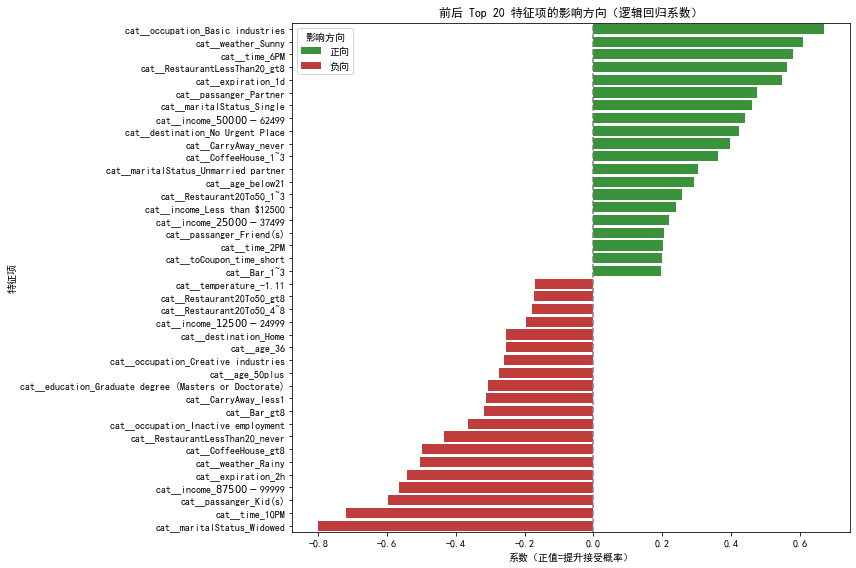


üîç Ê≠£Âú®ÂàÜÊûê coupon Á±ªÂûãÔºöCoffee House

üìä Ê®°ÂûãËØÑ‰º∞Êä•ÂëäÔºö
              precision    recall  f1-score   support

           0     0.7105    0.7029    0.7067       377
           1     0.7136    0.7209    0.7172       387

    accuracy                         0.7120       764
   macro avg     0.7120    0.7119    0.7119       764
weighted avg     0.7120    0.7120    0.7120       764

Accuracy : 0.7120
Precision: 0.7136
Recall   : 0.7209

üéØ ÊØè‰∏™ÁâπÂæÅÈ°πÂØπÊé•Êî∂‰ºòÊÉ†Âà∏ÁöÑÂΩ±ÂìçÊñπÂêëÔºàÂâçÈÉ®ÂàÜÔºâ:
| feature                          |     coef | impact   |
|:---------------------------------|---------:|:---------|
| cat__CoffeeHouse_4~8             | 0.865419 | Ê≠£Âêë     |
| cat__CoffeeHouse_gt8             | 0.811724 | Ê≠£Âêë     |
| cat__CoffeeHouse_1~3             | 0.59709  | Ê≠£Âêë     |
| cat__time_10AM                   | 0.542192 | Ê≠£Âêë     |
| cat__Bar_never                   | 0.451208 | Ê≠£Âêë     |
| cat__expiration_1d               | 0.420319 | Ê

D:\Anaconda\data\lib\site-packages\pandas\compat\_optional.py:117: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\data\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



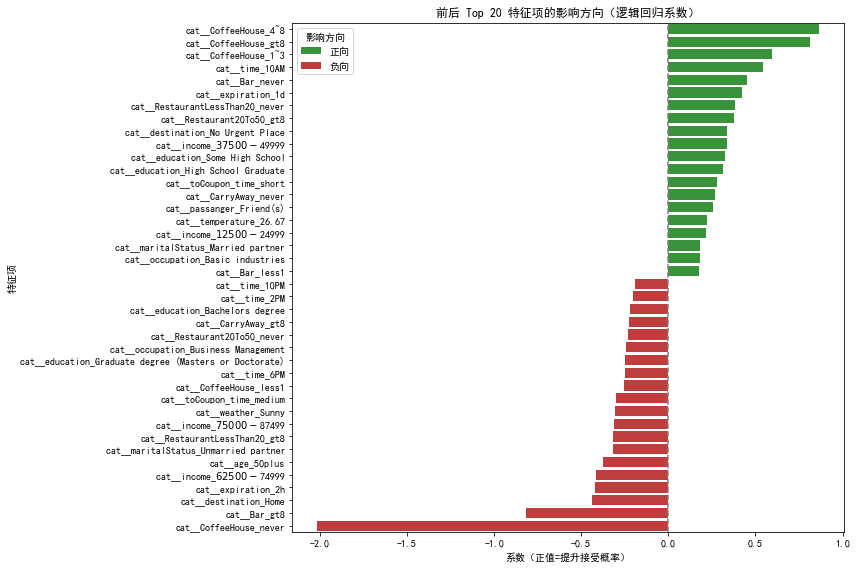


üîç Ê≠£Âú®ÂàÜÊûê coupon Á±ªÂûãÔºöBar

üìä Ê®°ÂûãËØÑ‰º∞Êä•ÂëäÔºö
              precision    recall  f1-score   support

           0     0.7339    0.7634    0.7484       224
           1     0.6467    0.6101    0.6278       159

    accuracy                         0.6997       383
   macro avg     0.6903    0.6867    0.6881       383
weighted avg     0.6977    0.6997    0.6983       383

Accuracy : 0.6997
Precision: 0.6467
Recall   : 0.6101

üéØ ÊØè‰∏™ÁâπÂæÅÈ°πÂØπÊé•Êî∂‰ºòÊÉ†Âà∏ÁöÑÂΩ±ÂìçÊñπÂêëÔºàÂâçÈÉ®ÂàÜÔºâ:
| feature                          |     coef | impact   |
|:---------------------------------|---------:|:---------|
| cat__Bar_4~8                     | 0.972616 | Ê≠£Âêë     |
| cat__education_Some High School  | 0.937457 | Ê≠£Âêë     |
| cat__RestaurantLessThan20_never  | 0.870637 | Ê≠£Âêë     |
| cat__time_6PM                    | 0.827355 | Ê≠£Âêë     |
| cat__maritalStatus_Widowed       | 0.743978 | Ê≠£Âêë     |
| cat__passanger_Friend(s)         | 0.739878 | Ê≠£Âêë    

D:\Anaconda\data\lib\site-packages\pandas\compat\_optional.py:117: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\data\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



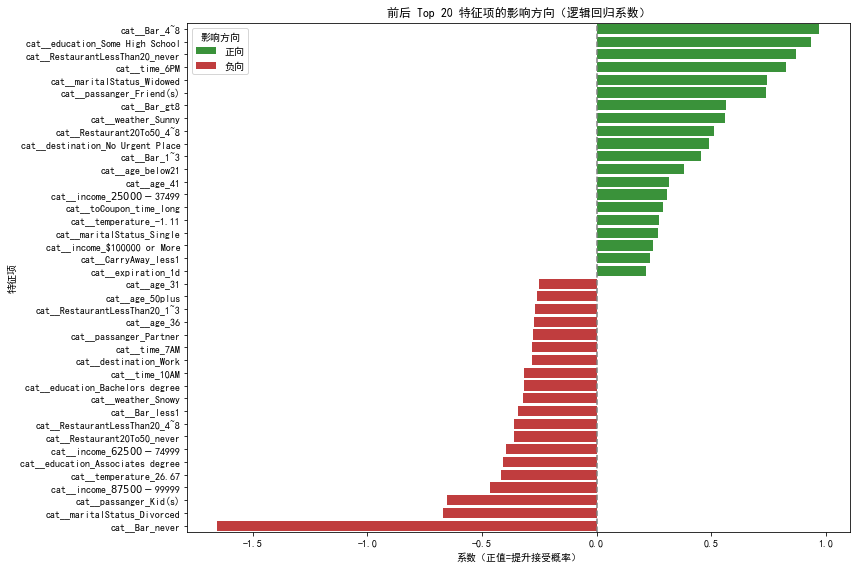


üîç Ê≠£Âú®ÂàÜÊûê coupon Á±ªÂûãÔºöCarry out & Take away

üìä Ê®°ÂûãËØÑ‰º∞Êä•ÂëäÔºö
              precision    recall  f1-score   support

           0     0.6410    0.2000    0.3049       125
           1     0.7602    0.9577    0.8476       331

    accuracy                         0.7500       456
   macro avg     0.7006    0.5789    0.5762       456
weighted avg     0.7275    0.7500    0.6988       456

Accuracy : 0.7500
Precision: 0.7602
Recall   : 0.9577

üéØ ÊØè‰∏™ÁâπÂæÅÈ°πÂØπÊé•Êî∂‰ºòÊÉ†Âà∏ÁöÑÂΩ±ÂìçÊñπÂêëÔºàÂâçÈÉ®ÂàÜÔºâ:
| feature                          |     coef | impact   |
|:---------------------------------|---------:|:---------|
| cat__education_Some High School  | 0.885369 | Ê≠£Âêë     |
| cat__destination_No Urgent Place | 0.626237 | Ê≠£Âêë     |
| cat__RestaurantLessThan20_never  | 0.50682  | Ê≠£Âêë     |
| cat__time_6PM                    | 0.493016 | Ê≠£Âêë     |
| cat__occupation_Social service   | 0.473798 | Ê≠£Âêë     |
| cat__time_2PM                    | 0.4

D:\Anaconda\data\lib\site-packages\pandas\compat\_optional.py:117: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\data\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



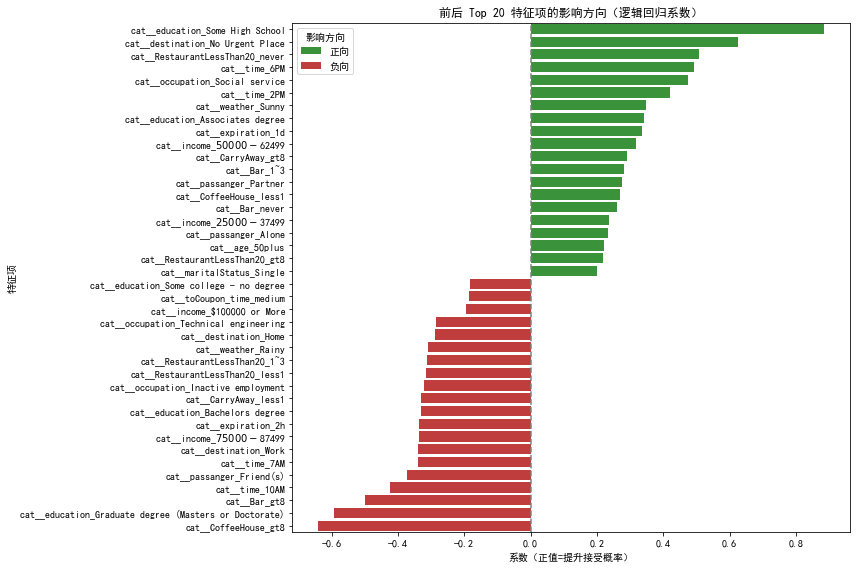


üîç Ê≠£Âú®ÂàÜÊûê coupon Á±ªÂûãÔºöRestaurant(20-50)

üìä Ê®°ÂûãËØÑ‰º∞Êä•ÂëäÔºö
              precision    recall  f1-score   support

           0     0.6420    0.7584    0.6954       149
           1     0.6667    0.5333    0.5926       135

    accuracy                         0.6514       284
   macro avg     0.6544    0.6459    0.6440       284
weighted avg     0.6537    0.6514    0.6465       284

Accuracy : 0.6514
Precision: 0.6667
Recall   : 0.5333

üéØ ÊØè‰∏™ÁâπÂæÅÈ°πÂØπÊé•Êî∂‰ºòÊÉ†Âà∏ÁöÑÂΩ±ÂìçÊñπÂêëÔºàÂâçÈÉ®ÂàÜÔºâ:
| feature                               |     coef | impact   |
|:--------------------------------------|---------:|:---------|
| cat__passanger_Partner                | 0.642293 | Ê≠£Âêë     |
| cat__Restaurant20To50_gt8             | 0.576134 | Ê≠£Âêë     |
| cat__expiration_1d                    | 0.538053 | Ê≠£Âêë     |
| cat__CoffeeHouse_1~3                  | 0.538004 | Ê≠£Âêë     |
| cat__Restaurant20To50_4~8             | 0.507163 | Ê≠£Âêë     |
| cat__oc

D:\Anaconda\data\lib\site-packages\pandas\compat\_optional.py:117: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Anaconda\data\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



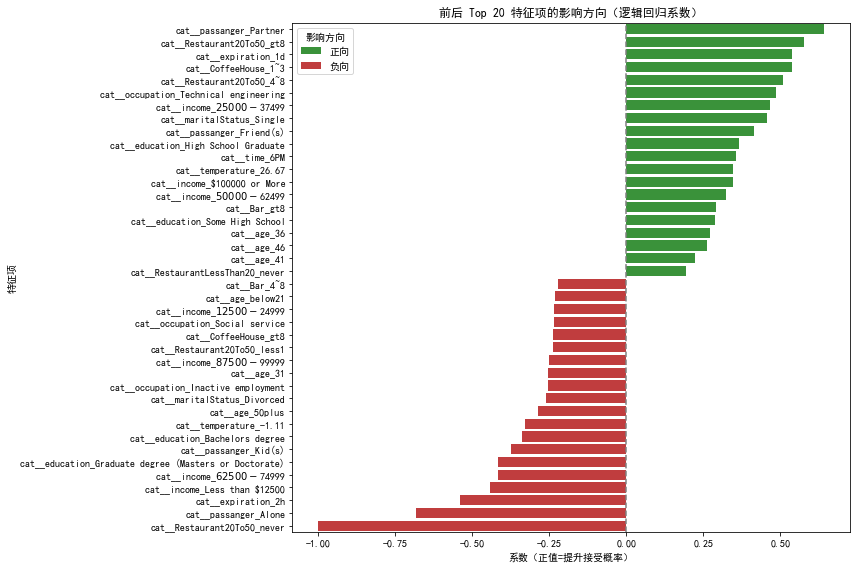

In [18]:
#ÊâæÂá∫ÈíàÂØπ‰∏çÂêåÁ±ªÂûãÊ∂àË¥πÁöÑÊòéÊòæÁªÑÂêà
types_features = ['destination',
'passanger',
'weather',
'temperature',
'time',
'expiration',
'gender',
'age',
'maritalStatus',
'has_children',
'education',
'occupation',
'income',
'Bar',
'CoffeeHouse',
'CarryAway',
'RestaurantLessThan20',
'Restaurant20To50',                  
'toCoupon_time'
]

# ÂàÜÊûê‰∏çÂêå coupon Á±ªÂûãÁöÑÂΩ±ÂìçÂõ†Á¥†
def analyze_by_coupon_type(data, coupon_types, feature_cols, target_col='Y', top_k=20):
    results = {}
    for coupon in coupon_types:
        print(f"\n{'='*60}\nüîç Ê≠£Âú®ÂàÜÊûê coupon Á±ªÂûãÔºö{coupon}\n")
        
        # Á≠õÈÄâÂØπÂ∫îÁ±ªÂûãÁöÑÊï∞ÊçÆ
        data_coupon = data[data['coupon'] == coupon]
        data_coupon = data_coupon[feature_cols + [target_col]].dropna()

        if len(data_coupon) < 100:
            print(f"‚ö†Ô∏è Êï∞ÊçÆÈáèËøáÂ∞èÔºà{len(df_coupon)} Êù°ÔºâÔºåË∑≥ËøáÂàÜÊûê„ÄÇ")
            continue

        # Ë∞ÉÁî®ÈÄªËæëÂõûÂΩíÁâπÂæÅÂàÜÊûêÂáΩÊï∞
        result = analyze_logistic_feature_impact(
            X=data_coupon[feature_cols],
            y=data_coupon[target_col],
            top_k=top_k
        )
        
        results[coupon] = result
    return results

# ÂàÜÊûêÊâÄÊúâÁ±ªÂûãÁöÑ coupon ÁöÑÂΩ±ÂìçÂõ†Á¥†
coupon_types = data['coupon'].dropna().unique().tolist()
coupon_feature_results = analyze_by_coupon_type(
    data=data,
    coupon_types=coupon_types,
    feature_cols=types_features,
    target_col='Y',
    top_k=20
)

ÂØπ‰∫é‰∏çÂêåÁ±ªÂûãÁöÑÈÉΩËøõË°å‰∫ÜÂàÜÊûêÔºåÂèØ‰ª•ÁúãÂá∫‰∏çÂêåÁ±ªÂûãÁöÑÊ∂àË¥πÂú∫ÊâÄÂΩ±ÂìçÁâπÂæÅÊúâÂæàÂ§ß‰∏çÂêåÔºåÂõ†Ê≠§ÂêéÁª≠Êé®ÈÄÅ‰ºòÊÉ†Âà∏Êó∂ÔºåÂ¶ÇÊûúÊúâÂÖ∑‰ΩìÁöÑÈíàÂØπÊüê‰∏ÄÁ±ªÂûãÊ∂àË¥πÂú∫ÊâÄÊèêÈ´òÔºåÈÇ£‰πàÈááÁî®Á≠ñÁï•ÂíåÂØπÊï¥‰ΩìÊé®ÈÄÅ‰ºòÊÉ†Âà∏ÁöÑÁ≠ñÁï•ÂèàÊúâ‰∏çÂêå„ÄÇ
ÂêåÁêÜÈúÄË¶ÅÊó∂ÂèØÁ≠õÈÄâÁªÑÂêàÁâπÂæÅÔºåÈíàÂØπÊÄßÊé®ÈÄÅÁ≠ñÁï•„ÄÇÂèØ‰ºòÂåñÊñπÂêëÊòØÔºå‰ΩøÁî®Á≤æÂ∫¶Êõ¥È´òÁöÑÁÆóÊ≥ïÂπ∂‰∏îÂØπÁî®Êà∑Êõ¥Â§öË°å‰∏∫Êï∞ÊçÆ+ÂÅèÂ•ΩÊï∞ÊçÆËøõË°åÊåñÊéòÔºåÂΩìÁî®Êà∑‰ΩçÁΩÆÊàñËÄÖË°åÁ®ãÊúâÂèòÂåñÊó∂ÔºåÂèØ‰ª•ÂÆûÊó∂Êé®ÈÄÅÈíàÂØπÊÄß‰ºòÊÉ†Âà∏„ÄÇÂΩìÁÑ∂ÂÖ∑‰ΩìÂÆûÊñΩÊó∂ÔºåË¶ÅËÄÉËôëÁî®Êà∑‰ΩìÈ™å„ÄÅËÆ°ÁÆóÊàêÊú¨„ÄÅÂêàÊ≥ïÂêàËßÑÁ≠âÊñπÈù¢ËøõË°åÂÖ∑‰ΩìËÆæËÆ°„ÄÇ
‰ΩøÁî®ÁÆóÊ≥ï+Â§ßÊï∞ÊçÆËøõË°åÊé®ËçêÂêéÔºåÊï∞ÊçÆÂàÜÊûêÂ§çÁõò‰πüÊòØÊúâÂøÖË¶ÅÁöÑ„ÄÇÂêåÊ†∑ÂØπ‰∫éÊåáÊ†áÂèòÂåñÈúÄË¶ÅÊòéÁôΩwhyÂíåwhatÔºåÊâçÊúâÂèØËÉΩÂà∂ÂÆöÂá∫Êõ¥ÊúâÊïàÁöÑË∞ÉÊï¥ÊñπÂêë„ÄÇ

In [35]:
types_results = []

for coupon, df in coupon_feature_results.items():
    df['coupon'] = coupon  # Ê∑ªÂä† coupon Á±ªÂûã
    types_results.append(df)

# ÂêàÂπ∂‰∏∫‰∏Ä‰∏™ DataFrame
types_result_data = pd.concat(types_results, ignore_index=True)

# ‰øùÂ≠ò‰∏∫ Excel Êñá‰ª∂Ôºà‰∏Ä‰∏™ sheetÔºâ
types_result_data.to_excel(r"D:\ÂÖºËÅå\ÂÖºËÅå\‰ΩúÂìÅÈ°πÁõÆ\types_result_data.xlsx", index=False)

distutils Version classes are deprecated. Use packaging.version instead.
distutils Version classes are deprecated. Use packaging.version instead.


#### ÂØπ‰∫éÊúâÊïàÊÄßËæÉ‰ΩéÁöÑÁî®Êà∑&Âú∫ÊôØÔºåÊèêÂá∫ÈíàÂØπÊÄßÁî®Êà∑ÂàÜÁæ§„ÄÅÂú∫ÊôØËß¶Âèë„ÄÅ‰ºòÊÉ†Âà∏ËÆæËÆ°Ë∞ÉÊï¥Êé™ÊñΩ

bar:
1.  ÂéªÈÖíÂêßÊ¨°Êï∞Â∞ëÊòØÈáçË¶ÅË¥üÂêëÂõ†Á¥†ÔºåÂèØÁªìÂêàÊ≠£ÂêëÂõ†Á¥†ÔºåÊèêÂá∫ÊòéÊòæÈôç‰ΩéÂÜ≥Á≠ñÂíåÊ∂àË¥πÊàêÊú¨ÁöÑÁªÑÂêàÔºåÊé®Âä®Áî®Êà∑ÂΩ¢ÊàêÊ∂àË¥π‰π†ÊÉØ„ÄÇ
Â¶ÇÔºöÂú®Êôö‰∏ä6ÁÇπÁªôÂπ¥ËΩª„ÄÅÂçïË∫´‰∫∫Â£´Êé®ÈÄÅÂ§ßÈ¢ù‰ºòÊÉ†Âà∏ÔºõÁªôÂ∏∏ÂéªÂÆ¢Êà∑Êé®Âá∫Â∏¶Êñ∞ÂÆ¢ËøõÂ∫ó‰ºòÊÉ†Âà∏Ôºõ
2. È´òÊî∂ÂÖ•‰∫∫Â£´‰πüÊòØÂº±ÊÑèÂêë‰∫∫Áæ§ÔºåÂèØ‰ª•ÈíàÂØπÊÄßÊé®ÈÄÅÈ´òÊ∂àË¥πÈÖíÂêßÂú∫ÊâÄ‰ºòÊÉ†Âà∏
3. ÂÖ¨Áõä‰ªé‰∏öËÄÖÂèØ‰ª•‰ªéÁ§æ‰ºöË¥£‰ªªËßíÂ∫¶Êé®Ë°å‰∏Ä‰∫õ‰ºòÊÉ†Âà∏ÔºöÊØèÊ∂àË¥π1Êçê0.1

Carry out & Take awayÔºö
1. ÂíñÂï°„ÄÅÈÖíÂêßÂ∏∏ÂÆ¢„ÄÅÂ∏¶Â≠©Â≠ê‰∫∫Áæ§„ÄÅÊúâÊúãÂèã‰∫∫Áæ§ÂØπ‰∫éÂ§ñÂ∏¶ÊòéÊòæË¥üÂêëÔºåÂèØËÉΩÁî®Êà∑Êõ¥ÁúãÈáçËøô‰∫õÂú∫ÊâÄÁ©∫Èó¥ÂíåÁ§æ‰∫§Â±ûÊÄßÔºö
a. ÂáèÂ∞ëÂØπÂ§ñÂ∏¶‰ºòÊÉ†Âà∏Êé®Ëçê
b. ÁªìÂêàÂú∞ÁêÜ‰ΩçÁΩÆÔºåÂØπ‰∫éÁ≠â‰ΩçÊó∂Èó¥ËæÉÈïøÁöÑÈ§êÂéÖ„ÄÅÂÖ¨Âõ≠Ê∏∏‰πêÂú∫Á≠âÈÄÇÂêàÊà∑Â§ñÂ∞±È§êÁöÑÂú∞ÁÇπÂèØÁªìÂêàÈ´òËΩ¨ÂåñÁâπÂæÅÊé®ÈÄÅ

Coffee HouseÔºö
1. Êó∂Èó¥‰∏äË∂äÊó©Êé®ÈÄÅÊïàÊûúË∂äÂ•Ω
2. ÂéªÂíñÂï°Â∫óÂ∞ë+ÈÖíÂêßÂ§öÊòØÊòéÊòæË¥üÂêëÂõ†Á¥†ÔºåÂèØËÉΩÂõ†‰∏∫‰∏§ËÄÖ‰ΩøÁî®Êó∂Èó¥ÊúâÂÜ≤Á™ÅÔºåÂõ†Ê≠§Ôºö
a. ‰∫íÊñ•Êé®ÈÄÅ
b. Ââç‰∏ÄÂ§©Êó©ÁªìÊùüÊ¥ªË∑É+‰ªäÊó•Êó©Ê¥ªË∑ÉÁî®Êà∑ÂèØÁªìÂêàÊ≠£ÂêëÁâπÂæÅÊé®ÈÄÅ

Restaurant(<20)Ôºö
1. ‰∏äÂçà10ÁÇπÊòéÊòæÊ≠£ÂêëÔºå‰∏ãÂçà6ÁÇπÊòéÊòæÊ≠£ÂêëÔºåÂíåRestaurant(20-50)ÁöÑÁâπÂæÅÂÖ∑ÊúâÁõ∏‰ººÊÄß„ÄÇÁî®Êà∑Ê∂àË¥π‰π†ÊÉØÊõ¥ÂÄæÂêë‰∫éÊôöÈ§êÂéªÈ§êÈ¶ÜÊ∂àË¥πÔºåÊâÄ‰ª•ÂèØ‰ª•Âú®Êôö‰∏äÊé®ÈÄÅÈ§êÂéÖ‰ºòÊÉ†Âà∏„ÄÇ
2. È´òÊî∂ÂÖ•„ÄÅÂ∏∏ÂéªRestaurant(20-50)ÁöÑ‰∫∫Áæ§ÊòØÂº±ÊÑèÂêëÂÆ¢Êà∑ÔºåËøôÈÉ®ÂàÜ‰∫∫Áæ§ÂèØÊõ¥Â§öÊé®ÈÄÅÈ´ò‰ª∑ÂÄºÊ∂àË¥πÂú∫ÊâÄ‰ºòÊÉ†Âà∏

Restaurant(20-50)Ôºö
1. Êú™ÂÖªÊàêÊ∂àË¥π‰π†ÊÉØÂíåÊî∂ÂÖ•ÊòØÂΩ±ÂìçÂõ†Á¥†ÔºåÈô§‰∫ÜÂèÇËÄÉbarÁöÑÁ≠ñÁï•ÔºåËÆ©Áî®Êà∑ÂÖªÊàêÊ∂àË¥π‰π†ÊÉØÂ§ñÔºå‰πüË¶ÅËÄÉËôëÂÆ¢ËßÇÊÉÖÂÜµÔºåÂ¶ÇÔºö
a.Âú®ËäÇÂÅáÊó•„ÄÅÂèëËñ™Êó•Êé®ÈÄÅ‰ºòÊÉ†Âà∏
b.Âíå‰ø°Áî®Âç°Á≠âËÅîÂêàÁªëÂÆöÊé®ÈÄÅ
